In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
merge_data = pd.merge(trial_data, mouse_data, on="Mouse ID", how="left")

# Display the data table for preview
merge_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_gr = merge_data.groupby(["Drug", "Timepoint"], as_index=False)
drug_gr3 = merge_data.groupby(["Drug", "Timepoint"], as_index=True)
mean_tumor_vol = pd.DataFrame(drug_gr["Tumor Volume (mm3)"].mean())
# Convert to DataFrame
mean_tumor_vol.head()
# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_gr2 = merge_data.groupby(["Drug", "Timepoint"], as_index=True)
# Convert to DataFrame

sem_vol = pd.DataFrame(drug_gr2["Tumor Volume (mm3)"].sem())

sem_vol2 = sem_vol.reset_index()

sem_vol2.set_index("Drug")
# Preview DataFrame

sem_vol2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames


table = mean_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:


drugs = sem_vol2.iloc[:,0]
sem = sem_vol2.iloc[:,2]
size = mean_tumor_vol.iloc[:,2]
time = sem_vol2.iloc[:,1]
placebo = mean_tumor_vol.loc[mean_tumor_vol["Drug"] == "Placebo"]
placebo1 = placebo["Tumor Volume (mm3)"]
placebo2 = placebo["Timepoint"]
placebo3 = sem_vol2.loc[sem_vol2["Drug"] == "Placebo"]
placebo4 = placebo3["Tumor Volume (mm3)"]
capo = mean_tumor_vol.loc[mean_tumor_vol["Drug"] == "Capomulin"]
capo1 = capo["Tumor Volume (mm3)"]
capo2 = capo["Timepoint"]
capo3 = sem_vol2.loc[sem_vol2["Drug"] == "Capomulin"]
capo4 = capo3["Tumor Volume (mm3)"]
infu = mean_tumor_vol.loc[mean_tumor_vol["Drug"] == "Infubinol"]
infu1 = infu["Tumor Volume (mm3)"]
infu2 = infu["Timepoint"]
infu3 = sem_vol2.loc[sem_vol2["Drug"] == "Infubinol"]
infu4 = infu3["Tumor Volume (mm3)"]
keta = mean_tumor_vol.loc[mean_tumor_vol["Drug"] == "Ketapril"]
keta1 = keta["Tumor Volume (mm3)"]
keta2 = keta["Timepoint"]
keta3 = sem_vol2.loc[sem_vol2["Drug"] == "Ketapril"]
keta4 = keta3["Tumor Volume (mm3)"]

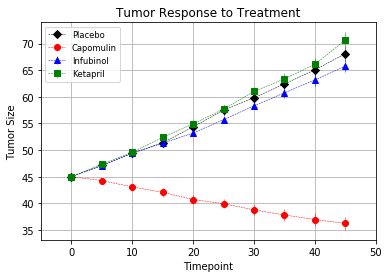

In [6]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
#ax.errorbar(time, size, sem, )
ax.errorbar(placebo2, placebo1, placebo4, fmt="D", color="black", linestyle="dashed", linewidth=.5, label="Placebo")
ax.errorbar(capo2, capo1, capo4, fmt="o", color="r", linestyle="dashed", linewidth=.5, label="Capomulin")
ax.errorbar(infu2, infu1, infu4, fmt="^", color="b", linestyle="dashed", linewidth=.5, label="Infubinol")
ax.errorbar(keta2, keta1, keta4, fmt="s", color="g", linestyle="dashed", linewidth=.5, label="Ketapril")
ax.set_xlim(-5, 50)
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Size")
ax.grid()
plt.title("Tumor Response to Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("data/tumor_response_plot.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_site = pd.DataFrame(drug_gr["Metastatic Sites"].mean())

# Convert to DataFrame
mean_meta_site.head()

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = pd.DataFrame(drug_gr2["Metastatic Sites"].sem())
# Convert to DataFrame

meta_sem2 = meta_sem.reset_index()

meta_sem2.set_index("Drug")
# Preview DataFrame

meta_sem2.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
table1 = mean_meta_site.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
table1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:


drugs1 = meta_sem2.iloc[:,0]
sem1 = meta_sem2.iloc[:,2]
site = mean_meta_site.iloc[:,2]
time1 = meta_sem2.iloc[:,1]
placebo_ = mean_meta_site.loc[mean_meta_site["Drug"] == "Placebo"]
placebo_1 = placebo_["Metastatic Sites"]
placebo_2 = placebo_["Timepoint"]
placebo_3 = meta_sem2.loc[meta_sem2["Drug"] == "Placebo"]
placebo_4 = placebo_3["Metastatic Sites"]
capo_ = mean_meta_site.loc[mean_meta_site["Drug"] == "Capomulin"]
capo_1 = capo_["Metastatic Sites"]
capo_2 = capo_["Timepoint"]
capo_3 = meta_sem2.loc[meta_sem2["Drug"] == "Capomulin"]
capo_4 = capo_3["Metastatic Sites"]
infu_ = mean_meta_site[mean_meta_site["Drug"] == "Infubinol"]
infu_1 = infu_["Metastatic Sites"]
infu_2 = infu_["Timepoint"]
infu_3 = meta_sem2.loc[meta_sem2["Drug"] == "Infubinol"]
infu_4 = infu_3["Metastatic Sites"]
keta_ = mean_meta_site[mean_meta_site["Drug"] == "Ketapril"]
keta_1 = keta_["Metastatic Sites"]
keta_2 = keta_["Timepoint"]
keta_3 = meta_sem2.loc[meta_sem2["Drug"] == "Ketapril"]
keta_4 = keta_3["Metastatic Sites"]

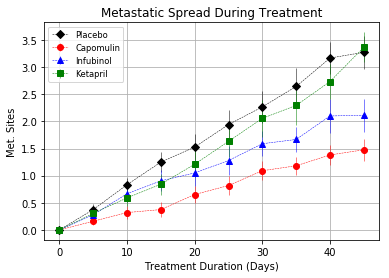

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(placebo_2, placebo_1, placebo_4, fmt="D", color="black", linestyle="dashed", linewidth=.5, label="Placebo")
ax.errorbar(capo_2, capo_1, capo_4, fmt="o", color="r", linestyle="dashed", linewidth=.5, label="Capomulin")
ax.errorbar(infu_2, infu_1, infu_4, fmt="^", color="b", linestyle="dashed", linewidth=.5, label="Infubinol")
ax.errorbar(keta_2, keta_1, keta_4, fmt="s", color="g", linestyle="dashed", linewidth=.5, label="Ketapril")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.grid()
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("data/metastatic_spread_plot.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = pd.DataFrame(drug_gr2["Mouse ID"].count())

# Convert to DataFrame
mice_count1 = mice_count.reset_index()
# Preview DataFrame
mice_count1.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
table2 = mice_count1.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
table2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
#For each row in munged table, calculate the survival percentage 
mice_0 = table2.iloc[0,:]
mice_0p = mice_0/mice_0 * 100
mice_5 = table2.iloc[1,:]
mice_5p = mice_5/mice_0 * 100
mice_10 = table2.iloc[2,:]
mice_10p = mice_10/mice_0 * 100
mice_15 = table2.iloc[3,:]
mice_15p = mice_15/mice_0 * 100
mice_20 = table2.iloc[4,:]
mice_20p = mice_20/mice_0 * 100
mice_25 = table2.iloc[5,:]
mice_25p = mice_25/mice_0 * 100
mice_30 = table2.iloc[6,:]
mice_30p = mice_30/mice_0 * 100
mice_35 = table2.iloc[7,:]
mice_35p = mice_30/mice_0 * 100
mice_40 = table2.iloc[8,:]
mice_40p = mice_40/mice_0 * 100
mice_45 = table2.iloc[9,:] 
mice_45p = mice_45/mice_0 * 100

#Put survival percentages into a dataframe
mice_p = [mice_0p, mice_5p, mice_10p, mice_15p, mice_20p, mice_25p, mice_30p, mice_35p, mice_40p, mice_45p]
mice_df = pd.DataFrame(mice_p)

#Get the time in days from the chart 
#(I used Placebo to pull times, since they are all the same for each drug)
placebo_a= mice_count1.loc[mice_count1["Drug"] == "Placebo"]
time_a2 = placebo_a["Timepoint"]


#Get survival rate info for each drug
placebo_a3 = mice_df["Placebo"]
infu_a3 = mice_df["Infubinol"]
keta_a3 = mice_df["Ketapril"]
capo_a3 = mice_df["Capomulin"]

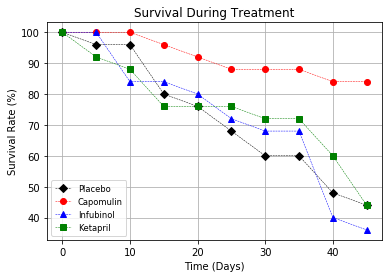

In [15]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
ax.plot(time_a2,placebo_a3, "D", color="black", linestyle="dashed", linewidth=.5, label="Placebo")
ax.plot(time_a2, capo_a3, "o", color="r", linestyle="dashed", linewidth=.5, label="Capomulin")
ax.plot(time_a2, infu_a3, "^", color="b", linestyle="dashed", linewidth=.5, label="Infubinol")
ax.plot(time_a2, keta_a3, "s", color="g", linestyle="dashed", linewidth=.5, label="Ketapril")
ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("data/survival_rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

drug_gr3 = merge_data.groupby(["Drug", "Timepoint"], as_index=True)
# Convert to DataFrame

mean_vol = pd.DataFrame(drug_gr2["Tumor Volume (mm3)"].mean())

mean_vol2 = mean_vol.reset_index()

#mean_vol2.set_index("Drug")

# Preview DataFrame
mean_vol3 = mean_vol2.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

tumor_0 = mean_vol3.iloc[0,:] 
tumor_45 = mean_vol3.iloc[9,:]
tumor_ch = ((tumor_45/tumor_0 - 1)*100)

# Display the data to confirm
tumor_ch1 = [tumor_0, tumor_45]
tumor_ch2 = pd.DataFrame(tumor_ch1)
tumor_ch

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

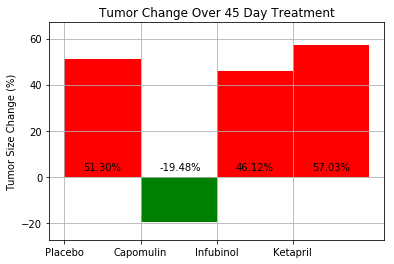

In [17]:
# Store all Relevant Percent Changes into a Tuple

placebo_a4 = tumor_ch["Placebo"]
infu_a4 = tumor_ch["Infubinol"]
keta_a4 = tumor_ch["Ketapril"]
capo_a4 = tumor_ch["Capomulin"]
final_dr = (placebo_a4, capo_a4, infu_a4, keta_a4)
name_dr = ["Placebo", "Capomulin", "Infubinol", "Ketapril"]
x_axis = np.arange(0, len(final_dr))
ticks = []
for x in x_axis:
        ticks.append(x)
fig, ax = plt.subplots()
plt.ylim(min(tumor_ch)-5, (max(tumor_ch)+10))

# Format data to show proper color for failing and passing
# Format chart to show percentage values
# Format to apply labels, etc

the_chart = plt.bar(x_axis, final_dr, color=["red", "green", "red", "red"],align="edge", width=1)
plt.xticks(ticks, name_dr)


plt.grid()

plt.ylabel("Tumor Size Change (%)")
plt.title("Tumor Change Over 45 Day Treatment")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()  
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/100), (p.get_x()+.25*width, p.get_y() +3 ))

# Save the Figure
plt.savefig("data/survival_rates.png")

# Show the Figure
plt.show()